# The Logistic Map

In [407]:
using Plots
using Roots
using Polynomials

## Plot the time series

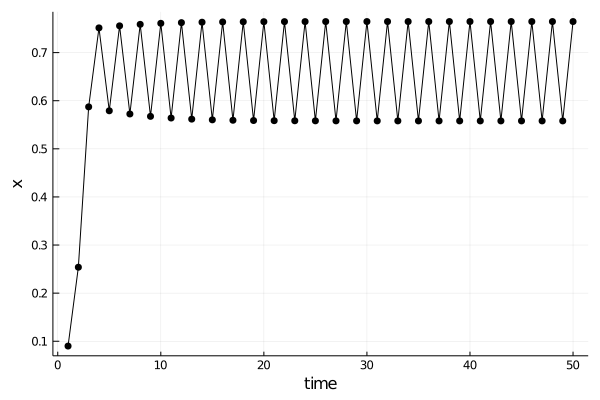

In [642]:
# Plot x vs t
r = 3.1
f(x,r) = r*x*(1-x)
x0 = 0.09
n = 50
data = zeros(n,2)
for i in 1:n
    data[i, 1] = x0
    x0 = f(x0)
    data[i, 2] = f(x0)
end
plot(data[:,1], color=:black, legend=false, xlabel=:time, ylabel=:x)
scatter!(data[:,1], color=:black, legend=false)

## Plot the bifurcation diagram

In [699]:
# Define the function
f(x,r) = r*x*(1-x)

#Inputs
#######################
# x0   - initial condition
# dr   - step size in r
# ri   - initial value of r for the bifurcation diagram
# rf   - final value of r for the bifurcation diagram
########################
# n    - no of steps taken
# l    - last tenth of the trajectory
# data - to store the points for a fixed r
########################
x0 = 0.15
dr = 0.01
ri = 0
rf = 4
n = floor(Int, 4/dr)
l = floor(Int, 0.1*n)
data = zeros(n,2)

# Plot the final tenth of a trajectory for a fixed r, increment r, and repeat
s=scatter([(0,0)], color=:black, legend=false, markersize=1)
for r in ri:dr:rf
    x = x0
    for i in 1:n
        data[i,1] = r
        data[i,2] = x
        x = f(x,r)
    end
    s=scatter!(s,data[n-l:n,1],data[n-l:n,2], color=:black, legend=false, markersize=1)   
end
s

In [703]:
#Plot the critical points and trajectories

# Critical r values
r1 = 1
r2 = 3
r3 = 1+sqrt(6)

# The 1-orbit
g1(r) = 1-1/r

# The 2-orbit
gx0(r) = (1+r + sqrt((r-3)*(r+1)))/(2*r)
gx1(r) = (1+r - sqrt((r-3)*(r+1)))/(2*r)

# Plotting
plot!(s,g1, 1, 3, color=:blue, linewidth = 2)
plot!(s,g1, 3, 4, color=:blue, linestyle=:dash, linewidth = 1.5)
plot!(s,gx0, 3, r3, color=:green, linestyle=:solid, linewidth = 1.5)
plot!(s,gx1, 3, r3, color=:green, linestyle=:solid, linewidth = 1.5)
plot!(s,gx0, r3, 4, color=:green, linestyle=:dash, linewidth = 1.5)
plot!(s,gx1, r3, 4, color=:green, linestyle=:dash, linewidth = 1.5)
scatter!(s,[(r3,gx1(r3))], color=:red,legend=:false)
scatter!(s,[(r3,gx0(r3))], color=:blue,legend=:false)
# scatter!(p,[(r,x1),(r,x2),(r,x3),(r,x4)], color=:magenta,legend=:false)

## Determination of the 4-orbit and its stability

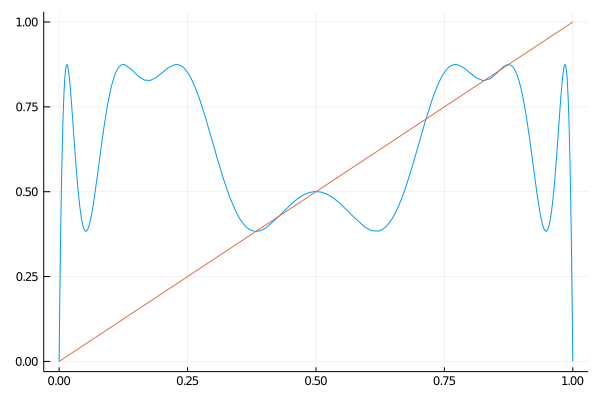

In [700]:
# The degree of the curve changes from 4 to 8 as r crosses r3
# Higher degree polynomial involves new intersections with y=x
# Get one of these intersections via find_zero and iterate using
# f(x,r) to get other points on the orbit. Check the stability condition
# of the periodic orbit, increment r, and repeat until the 4-orbit is
# unstable. Use the graph to provide a sensible guess to find_zero()
r = r3 + 0.05
f(x) = r*x*(1-x)
f4(x) = f(f(f(f(x))))
id(x) = x
plot([f4,id],0,1,legend=:false)

In [701]:
dr = 0.000001
guess = 0.5
r = r3 + dr
x = variable()
f(x,r) = r*x*(1-x)
fdiff(x,r) = r*(1-2*x)
f4(x,r) = f(f(f(f(x,r),r),r),r)
x1 = find_zero(f4(x,r) - x, guess, Order1())
x2 = f(x1,r)
x3 = f(x2,r)
x4 = f(x3,r)
fdiffProduct = abs(fdiff(x1,r)*fdiff(x1,r)*fdiff(x1,r)*fdiff(x1,r))
# print("prod of f' = ",fdiffProduct," r = ",r,"\n")
while fdiffProduct<1
    r = r + dr
    x1 = find_zero(f4(x,r) - x, guess, Order1())
    x2 = f(x1,r)
    x3 = f(x2,r)
    x4 = f(x3,r)
    fdiffProduct = abs(fdiff(x1,r)*fdiff(x2,r)*fdiff(x3,r)*fdiff(x4,r))
    guess = x1
end
r4 = r

3.544090742796401

In [704]:
scatter!(s,[(r,x1),(r,x2),(r,x3),(r,x4)], color=:magenta,legend=:false)

## Calculating the Feigenbaum's constant

In [679]:
(r2-r1)/(r3 - r2)

4.4494897427831805

In [680]:
(r3-r2)/(r4-r3)

4.751426969274628

Ideally, the two should have been equal. This indicates that r4 was not calculated with sufficient precision.

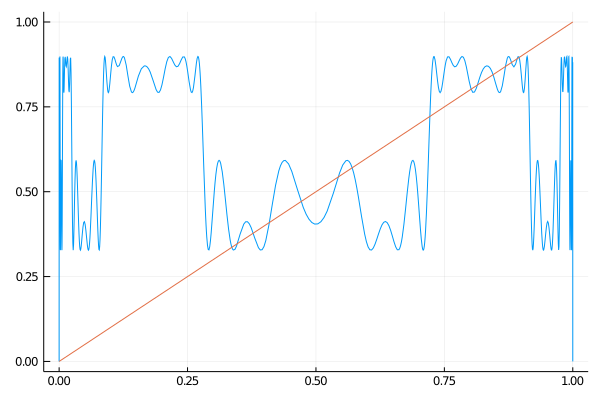

In [684]:
# Attempting a similar procedure for f8(x,r) proves difficult because 
# find_zero() doesn't converge
r = r4 + 0.05
x = variable()
f(x) = r*x*(1-x)
f4(x) = f(f(f(f(x))))
f8(x) = f4(f4(x,r),r)
id(x) = x
plot([f8,id],0,1,legend=:false)

In [710]:
guess = 0.72
find_zero(f8(x,r) - x, guess, Order1())

Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = 0.586467534321581. Too many steps taken. ")

---

<span style="color:gray">*Pulkit Dubey*</span>